# Logistic Regression Task
### Task Description: 
    Apply logistic regression on the given dataset from scratch without using the scikit-learn package for creating the model (train_test_split and accuracy scores may be imported).
    Dependent variable: Quality

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.metrics import accuracy_score

In [167]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [168]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Checking for null values:

In [169]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values.

#### Performing one-hot encoding and splitting the data:

In [170]:
x_normalised=df.drop(columns = 'quality')
y_normalised = pd.get_dummies(df['quality'],dtype=int)


def normalize(range):
    return (range - np.mean(range, axis=0)) / np.std(range, axis=0)

for column in x_normalised.columns:
    x_normalised[column]=normalize(x_normalised[column])

#Adding a unnamed column of 1s for the bias quantity:
x_normalised.insert(0, ' ', 1)


x_train,x_test,y_train,y_test = train_test_split(x_normalised,y_normalised,test_size=0.25,random_state=605)

w_initial=np.zeros((x_train.shape[1],y_train.shape[1]))

In [171]:
y_normalised

,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1594,0,0,1,0,0,0
1595,0,0,0,1,0,0
1596,0,0,0,1,0,0
1597,0,0,1,0,0,0


In [172]:
x_normalised

,,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,1,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,1,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,1,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,1,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,1,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [173]:
x_train

,,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
958,1,-1.102890,0.235635,-0.775267,-0.169427,0.691457,0.872638,-0.318315,-0.825061,1.029472,0.305990,0.823232
77,1,-0.873078,1.436727,-1.391472,-0.098479,0.351398,-0.179300,-0.500769,-0.077742,1.353436,-0.638220,0.260028
223,1,0.161077,0.654620,-0.107711,-0.382271,-0.094931,-0.753085,-0.561586,0.743779,-0.201591,-0.343154,-0.397043
542,1,0.563248,1.045674,-0.159061,-0.311323,-0.371229,-1.039977,-0.804858,-0.077742,-1.238276,-0.402167,-0.490910
351,1,0.448342,1.492592,-1.391472,0.043416,0.181368,-0.466193,-0.622404,1.406296,0.251958,1.014147,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...,...
330,1,1.080326,-0.937525,1.894957,0.256260,0.733965,-0.561823,-0.166270,0.664277,-0.525555,0.010924,1.949639
493,1,0.218530,0.906012,0.200392,0.327207,-0.031169,0.681377,1.050089,1.830307,1.094265,0.483029,1.104833
92,1,0.161077,-0.211283,0.097691,-0.382271,0.478920,0.298854,2.631355,0.240266,-2.469338,7.800650,-0.584777
883,1,-0.643266,0.403229,-1.186070,-0.027532,-0.243707,0.203223,1.262952,0.372770,1.418228,-0.638220,-0.866379


In [174]:
y_train

,3,4,5,6,7,8
958,0,0,0,0,1,0
77,0,0,0,1,0,0
223,0,0,0,1,0,0
542,0,0,1,0,0,0
351,0,0,0,1,0,0
...,...,...,...,...,...,...
330,0,0,0,1,0,0
493,0,0,0,1,0,0
92,0,0,1,0,0,0
883,0,0,1,0,0,0


In [175]:
x_test

,,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1504,1,-0.470907,-0.825796,1.535504,-0.169427,0.393905,-1.039977,-1.048130,-0.369250,0.316751,-0.638220,0.917099
1022,1,-0.758172,-0.099554,-0.929318,-0.311323,-0.541259,-1.135608,-1.139357,-0.480552,0.251958,-0.697233,0.072294
666,1,-0.011282,-0.211283,0.457144,-0.524166,2.859337,-0.944346,-0.926494,0.664277,-0.849519,-0.343154,-0.866379
348,1,0.735607,0.179770,0.200392,0.185312,0.032592,-0.083669,-0.014225,0.611276,-1.303068,1.545264,-0.397043
1555,1,-0.758172,0.179770,-0.518514,-0.595114,-0.477498,-0.083669,-0.683222,-0.851562,0.835093,0.128950,0.119227
...,...,...,...,...,...,...,...,...,...,...,...,...
263,1,-0.241094,-0.881661,-0.210412,-0.524166,-0.222453,0.681377,0.077002,-0.236746,-0.201591,0.069937,-1.054113
1496,1,-0.356000,0.068040,-0.056360,-0.453218,0.032592,0.681377,3.057081,-0.204945,-0.331177,-0.402167,-0.678644
1011,1,0.333436,-1.160984,0.200392,-0.382271,0.011338,-0.370562,-0.835267,-0.554754,-0.914312,-0.638220,-0.021574
620,1,-0.011282,0.068040,-0.159061,0.610998,-0.243707,0.011961,1.992767,0.452272,-0.266384,-0.284141,-0.960246


In [176]:
y_test

,3,4,5,6,7,8
1504,0,0,0,1,0,0
1022,0,0,1,0,0,0
666,0,0,0,1,0,0
348,0,0,0,1,0,0
1555,0,0,0,0,1,0
...,...,...,...,...,...,...
263,0,0,1,0,0,0
1496,0,0,1,0,0,0
1011,0,0,0,1,0,0
620,0,0,1,0,0,0


#### Softmax function:

In [177]:
def softmax(z):
    return(np.exp(z))/np.sum(np.exp(z),axis=1,keepdims=True)

#### Cost function and gradient descent:

In [178]:
def cost_function(y_hat,y):
    #return (-1/len(y))*(np.sum(y*np.log(y_hat)))
    return -1*np.mean(np.sum(y*np.log(y_hat)))


def gradient_descent(x,y,w,iterations,alpha):

    cost_val=[0]*iterations
    for i in range(iterations):
       z = np.dot(x,w)
       y_hat = softmax(z)

       cost_val[i]=cost_function(y_hat,y)

       delW = np.dot(x.T,(y_hat-y))/len(y)
       w-= alpha*delW
       
    return w,cost_val



In [179]:
w_opt,cost_values= gradient_descent(x_train,y_train,w_initial,alpha=0.145,iterations=1000)

#### Accuracy score:

In [180]:
z_predict=np.dot(x_test,w_opt)
prediction_list = np.argmax(softmax(z_predict),axis=1)

print(f"Accuracy is:{accuracy_score(np.argmax(y_test,axis=1),prediction_list)*100}%")


Accuracy is:66.0%


#### Learning Curve:

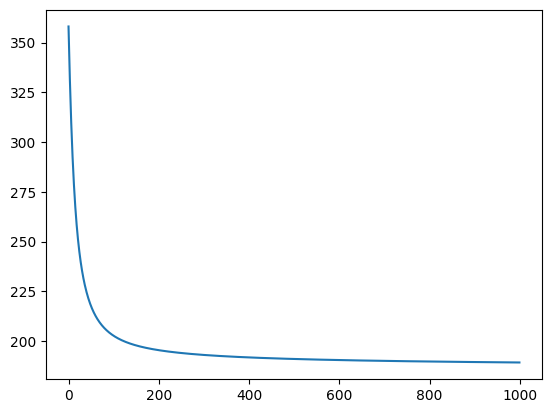

In [181]:
plt.plot(cost_values)